 ## Importing Necessary Libraries


* numpy for numerical operations
* tensorflow and keras for building the neural network
* matplotlib for visualizing data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from google.colab import files
from PIL import Image


## Load the MNIST Dataset

MNIST is a dataset of 28x28 grayscale images of handwritten digits (0-9). TensorFlow provides it directly, so we can load it easily.

In [ ]:
# Load the MNIST dataset from TensorFlow
mnist = keras.datasets.mnist

# Split into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28), Labels shape: (60000,)
Testing data shape: (10000, 28, 28), Labels shape: (10000,)


## Visualizing the Data

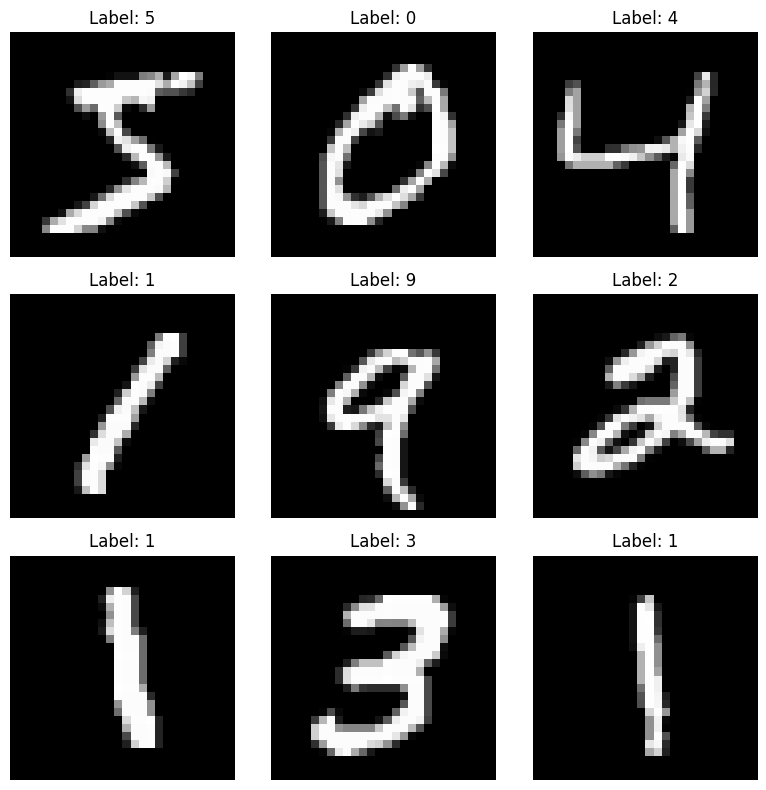

In [ ]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Set up a 3x3 grid of images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')  # Display image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Show the corresponding label
    plt.axis('off')  # Hide axis for better view

plt.tight_layout()
plt.show()


## Preprocessing the Data

Neural networks work better when input values are scaled properly. Since pixel values in MNIST range from 0 to 255, we normalize them to a range of 0 to 1 by dividing by 255.

### Why Normalize?

* Makes training faster and more stable.
* Helps the model learn better features.

In [ ]:
# Normalize pixel values to the range [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Print the new range of values
print(f"After normalization, pixel range: {x_train.min()} to {x_train.max()}")


After normalization, pixel range: 0.0 to 1.0


## Reshape the Data

For fully connected layers, we need to flatten each 28x28 image into a 1D array of 784 values.

In [ ]:
# Flatten the images (28x28 → 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Print new shape
print(f"New training shape: {x_train.shape}")
print(f"New testing shape: {x_test.shape}")


New training shape: (60000, 784)
New testing shape: (10000, 784)


## Building the Neural Network Model

We'll create a fully connected neural network (MLP - Multi-Layer Perceptron) using keras.Sequential().

In [ ]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),  # Hidden layer 2
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Print model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

Before training, we need to:

* Choose a loss function – sparse_categorical_crossentropy (since we have multiple classes).
* Select an optimizer – adam (efficient for neural networks).
* Track accuracy during training.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(" Our Model compiled successfully!")


 Our Model compiled successfully!


## Training the Model

Now, let's train the model on our dataset using model.fit().

In [ ]:
# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8767 - loss: 0.4217 - val_accuracy: 0.9608 - val_loss: 0.1235
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9691 - loss: 0.1041 - val_accuracy: 0.9701 - val_loss: 0.0968
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9787 - loss: 0.0688 - val_accuracy: 0.9702 - val_loss: 0.0934
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9828 - loss: 0.0527 - val_accuracy: 0.9757 - val_loss: 0.0822
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0397 - val_accuracy: 0.9804 - val_loss: 0.0710
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9899 - loss: 0.0312 - val_accuracy: 0.9773 - val_loss: 0.0777
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9767 - val_loss: 0.0904
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9930 - loss: 0.

* epochs=10 – The model will go through the dataset 10 times.
* validation_data=(x_test, y_test) – Checks accuracy on test data after each epoch.

## Evaluating the Model

Now that the model is trained, let’s evaluate it on the test data using model.evaluate().

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy and loss
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0855
Test Loss: 0.07102559506893158
Test Accuracy: 0.980400025844574


## Visualizing Training and Validation Loss & Accuracy


Visualizing how the model’s performance changes over time is crucial to understanding how well it’s learning. We can plot loss and accuracy graphs to see if the model is improving or if there’s any overfitting happening.

### How to Visualize the Training Process:

The training process details are stored in the history object (from model.fit()), so let’s use that to plot the graphs.

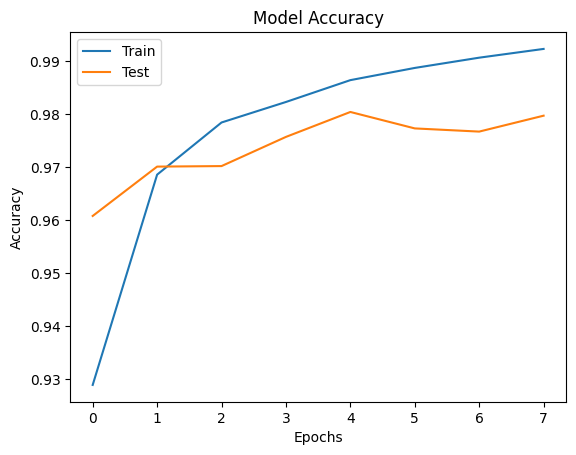

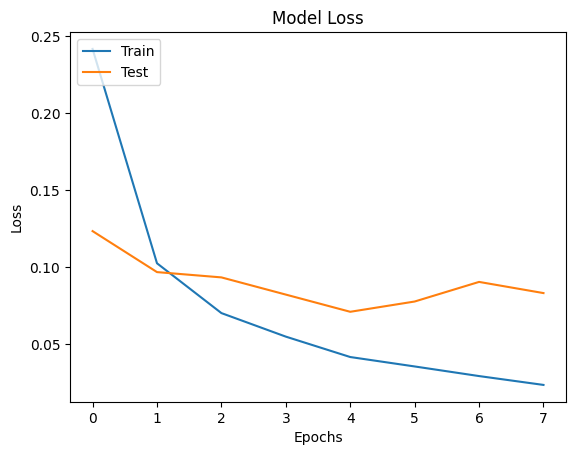

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Test the Model on New Data

* We can test how well the model performs on new, unseen data.
* we can make predictions on test data (or even new images) and compare the results.

In [ ]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Print the first 5 predicted values
print(predictions[:5])

# Convert predictions to class labels (the digit the model thinks it is)
predicted_labels = np.argmax(predictions, axis=1)

# Print the first 5 predicted labels
print(predicted_labels[:5])

# Check the actual labels from the test set
print(y_test[:5])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.9189803e-09 6.6039036e-08 6.0626581e-07 1.5302036e-06 5.1181416e-12
  2.0186717e-07 5.9383141e-12 9.9999636e-01 7.8275838e-07 4.5687293e-07]
 [4.4005255e-10 1.6238436e-04 9.9983740e-01 1.0236223e-07 2.1297340e-17
  1.5241239e-09 1.8057765e-09 2.3363783e-11 2.5787836e-07 2.7607926e-11]
 [2.5191664e-08 9.9996096e-01 4.0625837e-06 2.8245200e-08 1.8649695e-05
  4.6974275e-08 3.3261514e-07 9.1689526e-06 6.6839211e-06 4.6813162e-09]
 [9.9994284e-01 8.5396657e-08 1.9875570e-05 5.1117679e-09 1.1953135e-06
  1.2225811e-07 5.1181614e-06 1.8052096e-05 2.5132119e-09 1.2679850e-05]
 [5.7964311e-10 2.6545954e-09 7.9388840e-08 2.5090613e-10 9.9998802e-01
  1.2256454e-08 5.4123285e-07 4.9108428e-07 1.5661831e-07 1.0746608e-05]]
[7 2 1 0 4]
[7 2 1 0 4]


## Visualizing Predictions

we can also visualize some of the predicted digits from the test data to see how accurate the model is visually.

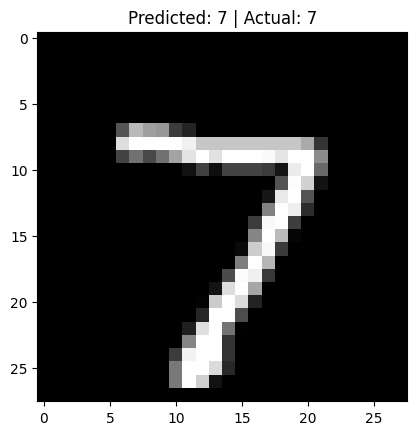

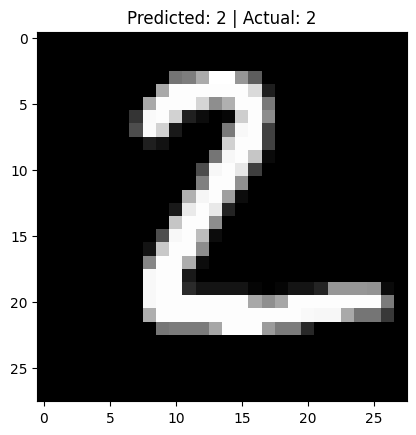

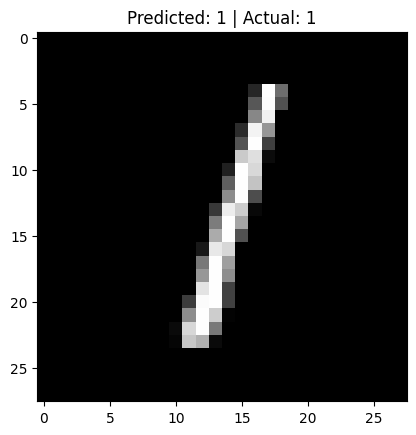

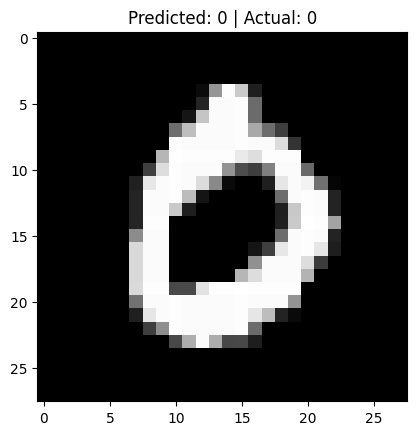

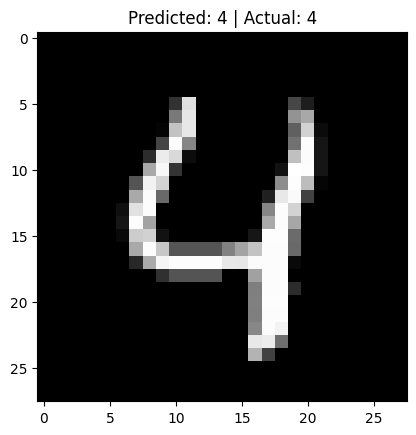

In [ ]:
# Visualize the first 5 test images and their predictions
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]} | Actual: {y_test[i]}")
    plt.show()


In [ ]:
uploaded = files.upload()

In [ ]:
# Get the first (and usually only) filename from the uploaded files
filename = list(uploaded.keys())[0]
print("Uploaded file:", filename)


In [ ]:
# Open the image file, convert it to grayscale ('L' mode), and resize to 28x28 pixels
img = Image.open(filename).convert('L')
img = img.resize((28, 28))

In [ ]:
# Convert the image to a numpy array
img_array = np.array(img)


# img_array = 255 - img_array

# Normalize pixel values (scale from 0-255 to 0-1)
img_array = img_array / 255.0


In [ ]:
# Reshape to add a batch dimension (1 image, 28*28 pixels)
img_array = img_array.reshape(1, 28 * 28)

print(img_array[0, :20])  # print the first 20 pixel values



In [ ]:
# Get prediction probabilities for each class (digit 0-9)
prediction = model.predict(img_array)

# The model returns probabilities; pick the class with the highest probability
predicted_digit = np.argmax(prediction)


In [ ]:
print("Predicted Digit:", predicted_digit)


In [ ]:
# Save the entire model (architecture, weights, and optimizer state)
model.save("handwritten_digit_model.h5")
print("Model saved as handwritten_digit_model.h5")


In [ ]:

# Load the saved model
model = load_model("handwritten_digit_model.h5")
print("Model loaded successfully!")
